Summary of the Paper

    Data are 42 SN type 1a a light curves at high z, and 18 at low z.
    
    There is a characteristic shape - magnitude relation for this type of supernovae.
    
    Spectral shape can be used to calculate absolute magnitude.  
    
    There is a difference in observed magnitude and absolute magnitude.
    
    Calculate the redshift of each object.  Silicon absorption feature (rest wavelength = 6355 angstroms).
    
    Calculate the scale factor at that redshift.
    
    Calculate the expected magnitude for the given scale factor.
    
    Determine the scale factor a function of wm and wl.
    
    Plot best fit curves for the data.
    
    Plot expected magnitude as a function of z
    
    Difference in observed and expected magnitudes 
    
    Fits theory of having positive wm, wl 
        
        flat k=0 so wm + wl = 1
        
        best fit wM = .73 wL = 1.32
        
    Extraordinarily thorough error analysis.
        

Structure of the code

    import data
    
    return mag as function of z based on wm, wl
    
    fit lsq curve to data mb vs z
    
    mbeff = mr + shape - Kb - Ar
        mr =
        shape = alpha(s-1)
        kb = cross filter K correrection from observed R band to rest frame B band. 
        ar =  extinction
    
    a(t) as a function of wm and wl and z
    
    
  

In [85]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import LambdaCDM
from astropy.stats import sigma_clip
from astropy.modeling import models, fitting
import scipy.stats as stats
import ipywidgets as widgets
from ipywidgets import interact

%matplotlib inline

Read data from Perlmutter 1999.  Superset of 60 SN at low and high z is 'sn'.

In [86]:
scp = pd.read_csv('perlmutter99table1.csv')
ct = pd.read_csv('perlmutter99table2.csv')
fits = pd.read_csv('perlmutter99table3.csv')
sn = pd.concat([scp,ct])
sn[:5] # Show first few rows for reference

,Unnamed: 0,sn,z,zerr,mpeak,mpeakerr,a,kcorrection,mbpeak,mbeff,mbefferr
0,0,1992bi,0.458,0.001,2.12,0.10,0.03,-0.72,22.81,23.11,0.46
1,1,1994F,0.354,0.001,22.08,0.10,0.11,-0.58,22.55,22.38,0.33
2,2,1994G,0.425,0.001,21.52,0.21,0.03,-0.68,22.17,22.13,0.49
3,3,1994H,0.374,0.001,21.28,0.06,0.10,-0.61,21.79,21.72,0.22
4,4,1994al,0.420,0.001,22.37,0.06,0.42,-0.68,22.63,22.55,0.25


Model expected magnitude for a limited set of universes, with various values for wm and wl.

Fit Power Law to SN data

In [88]:
model = models.PowerLaw1D(amplitude=sn.mbeff[20], x_0=sn.z[20], alpha=1)
fit = fitting.LevMarLSQFitter()
obs = fit(model, sn.z, sn.mbeff)

/home/whitney/anaconda3/lib/python3.6/site-packages/astropy/modeling/powerlaws.py:55: RuntimeWarning: invalid value encountered in power
  return amplitude * xx ** (-alpha)


Plot magnitude for given z, for data and for model universes above.

In [96]:
def mzplot(omegam=0, omegal=0):
    
    zsim = np.arange(0.001, 1, 0.01)
    cosmos = LambdaCDM(H0=cosmo.H(0), Om0=omegam, Ode0=omegal)    
    modbf = cosmos.distmod(zsim)
    mag = pd.DataFrame(data=modbf, columns=['mag'])
    mag = mag - 19.5 # Absolute Bolometric magnitude of SN1a = 19.5

    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_ylim(bottom=12.5, top=26)
    ax.set_xlim(left=0, right=1)
    ax.scatter(sn.z,sn.mbeff,marker='.')
    ax.plot(zsim,mag.mag,label="Model with wm=0.5, wl=0.5")
    ax.plot(zsim,obs(zsim), label="model fitted w/ data", color='red')
    ax.plot(zsim,obs(zsim), label="model fitted w/ data", color='red')
    ax.errorbar(sn.z,sn.mbeff,yerr=sn.mbefferr, fmt='.')
    ax.set_xlabel('z')
    ax.set_ylabel('mb')
    ax.set_title('SCP and CT SN 1a M_b vs Z')
    plt.show()      

interact(mzplot, omegam=(0, 3, .1),omegal=(0, 3, .1))

A Jupyter Widget

<function __main__.mzplot>

In [73]:
wmsim = np.arange(0, 3, 0.1)
wlsim = np.arange(0, 3, 0.1)
zsim = np.arange(0.01, 1, 0.1)
a = np.array([wmsim,wlsim,zsim])

#uni = LambdaCDM(H0=cosmo.H(0), Om0=wmsim, Ode0=wlsim) 
#a=uni.scale_factor(z)


Text(0.5,1,'Best Fit Confidence Regions in Omega Lambda Plane')

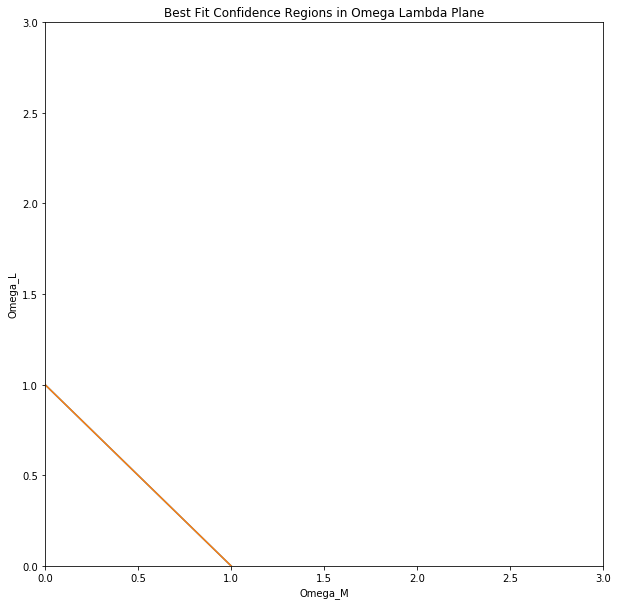

In [64]:
fits

fig, ax = plt.subplots(figsize=(10,10))

plt.xlim(0,3)                     
plt.ylim(0,3)                     
ax.plot(wmsim,1-wmsim) # k=0
ax.plot(wmsim,1-wmsim) # k=0
#ax.scatter(fits.omegambf,fits.omegalbf)
ax.set_xlabel('Omega_M')
ax.set_ylabel('Omega_L')
ax.set_title('Best Fit Confidence Regions in Omega Lambda Plane')


In [63]:
fits

,fit,n,chisq,dof,omegam,pomegagt0,omegambf,omegalbf,flag
0,A,60,98,56,0.29,0.9984,0.83,1.42,'All SN'
1,B,56,60,52,0.26,0.9992,0.85,1.54,'Excludes outliers'
2,C,54,56,50,0.28,0.9979,0.73,1.32,'B+ removed 2 reddened'
3,D,54,53,51,0.25,0.9972,0.76,1.48,'No stretch correction'
4,E,53,62,49,0.29,0.9894,0.35,0.76,'Bayesian extinction'
5,F,51,59,47,0.26,0.9991,0.85,1.54,'B+colors'
6,G,49,56,45,0.28,0.9974,0.73,1.32,'C+colors'
7,H,40,33,36,0.31,0.9857,0.16,0.50,'G smallset'
8,I,54,56,50,0.24,0.9994,0.80,1.52,'Sytematic uncertainty limit +0.03'
9,J,54,57,50,0.33,0.9912,0.72,1.20,'Sytematic uncertainty limit 10.04'
